In [1]:
import pandas as pd
from pathlib import Path

In [2]:
TRAIN_DATA_PATH = "../input/tabular-playground-series-may-2022/train.csv"
TEST_DATA_PATH  = "../input/tabular-playground-series-may-2022/test.csv"
fIG_SIZE = (8, 5)


In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', None)


train = pd.read_csv(TRAIN_DATA_PATH) 
test = pd.read_csv(TEST_DATA_PATH) 


In [4]:
import numpy as np


def display_data_info(dict_df):
    '''
        Show how many rows and cols, 
        number of missing rows,
        number of columns withs missing values,
        number of duplicates
    '''
    
    # Table column names
    index = [
        'No. rows'          , 
        'No. cols'          , 
        'No. null cols'     , 
        'No. missing values', 
        'No. duplicate rows', 
        'Float columns'     ,
        'Int columns'       ,
        'Object columns'    ,
    ]
    
    # empty data
    data = {}
    
    # looping over each dataframe
    for name, df in dict_df.items():
        
        # getting dataframe info
        num_rows, num_cols = df.shape                  # no. of rows , no. cols
        num_null_cols      = np.sum(df.isna().sum()>0) # No. null cols
        num_null_rows      = df.isna().sum().sum()     # no. missing values
        num_duplic_rows    = np.sum(df.duplicated()>0) # no. duplicated rows
        data_types         = df.dtypes.to_dict()       # data types
        
        # getting column of each type
        float_cols         = []
        int_cols           = []
        obj_cols           = []
        for col, t in data_types.items():
            if t == 'float64' : float_cols.append(col)
            elif t == 'int64' : int_cols.append(col)
            else              : obj_cols.append(col)
            
        data[name] = [
            num_rows        , 
            num_cols        , 
            num_null_cols   , 
            num_null_rows   , 
            num_duplic_rows , 
            float_cols      ,
            int_cols        ,
            obj_cols        ,
        ]
        
    new_df = pd.DataFrame(data=data, index=index)
    
    display(new_df)


In [5]:
display_data_info({'train': train, 'test': test})


,train,test
No. rows,800000,100000
No. cols,33,32
No. null cols,0,0
No. missing values,0,0
No. duplicate rows,0,0
Float columns,"[f_00, f_01, f_02, f_03, f_04, f_05, f_06, f_19, f_20, f_21, f_22, f_23, f_24, f_25, f_26, f_28]","[f_00, f_01, f_02, f_03, f_04, f_05, f_06, f_19, f_20, f_21, f_22, f_23, f_24, f_25, f_26, f_28]"
Int columns,"[id, f_07, f_08, f_09, f_10, f_11, f_12, f_13, f_14, f_15, f_16, f_17, f_18, f_29, f_30, target]","[id, f_07, f_08, f_09, f_10, f_11, f_12, f_13, f_14, f_15, f_16, f_17, f_18, f_29, f_30]"
Object columns,[f_27],[f_27]


In [6]:
def barchart(df, column):
    '''draws a barchart based on the column name'''
    ax = df[column].value_counts().head(10).plot.bar(figsize=fIG_SIZE)
    ax.bar_label(ax.containers[0])
    display(ax)
    
def pie(df, column):
    '''draws a pie based on the column name'''
    display(df[column].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', figsize=fIG_SIZE))


<Axes: xlabel='target'>

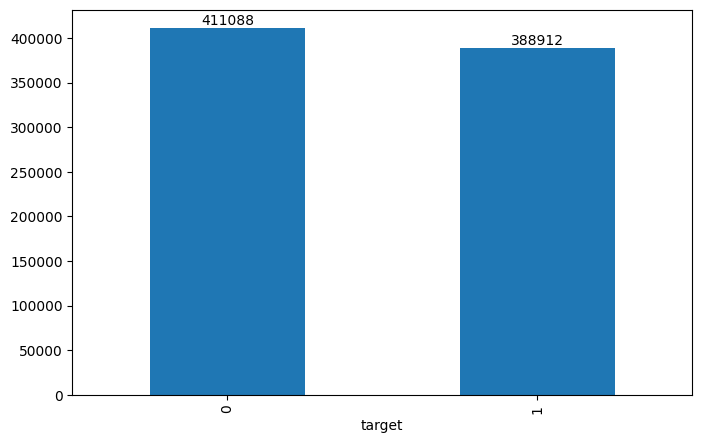

In [7]:
barchart(train, 'target')


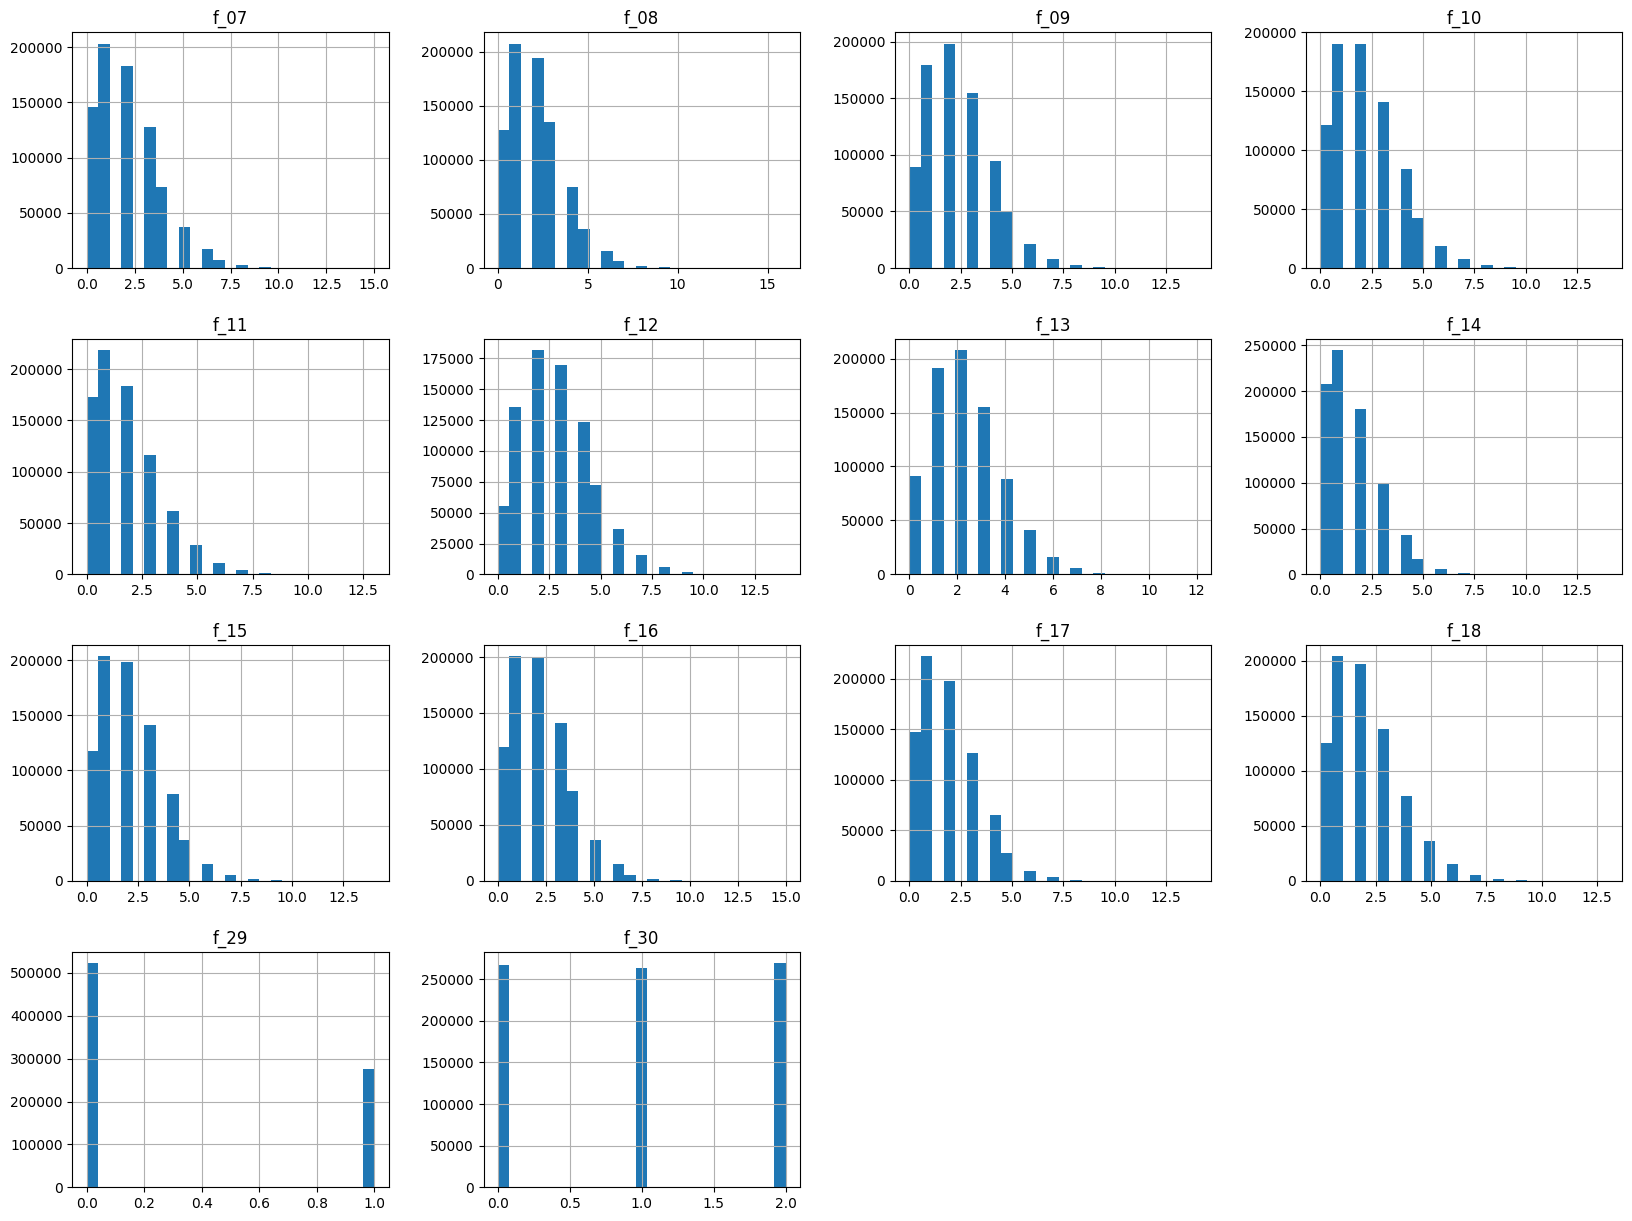

In [8]:
# int columns
train.hist(column=[
    'f_07', 'f_08', 
    'f_09', 'f_10', 
    'f_11', 'f_12', 
    'f_13', 'f_14', 
    'f_15', 'f_16', 
    'f_17', 'f_18', 
    'f_29', 'f_30'
], figsize=(20,15), bins=25);


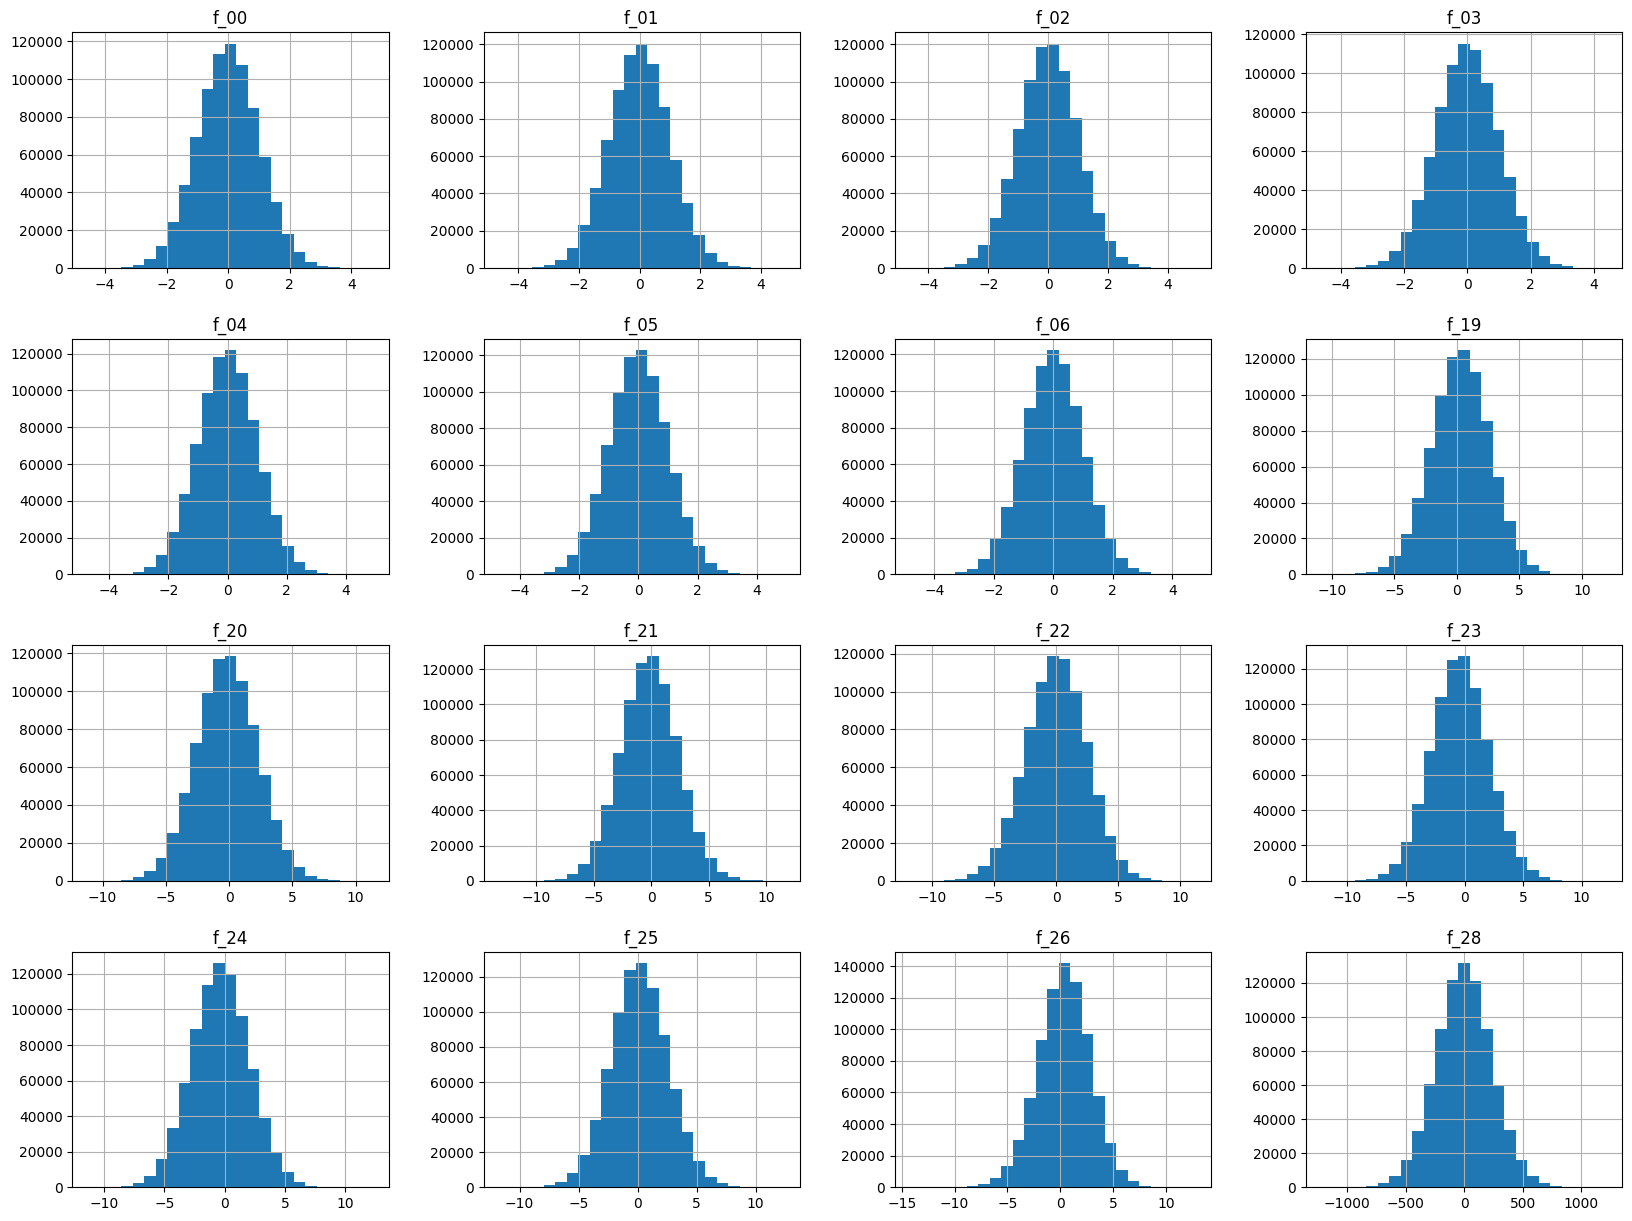

In [9]:
# float columns
train.hist(column=[
    'f_00', 'f_01', 
    'f_02', 'f_03', 
    'f_04', 'f_05', 
    'f_06', 'f_19', 
    'f_20', 'f_21', 
    'f_22', 'f_23', 
    'f_24', 'f_25', 
    'f_26', 'f_28'
], figsize=(20,15), bins=25);


<Axes: xlabel='f_27'>

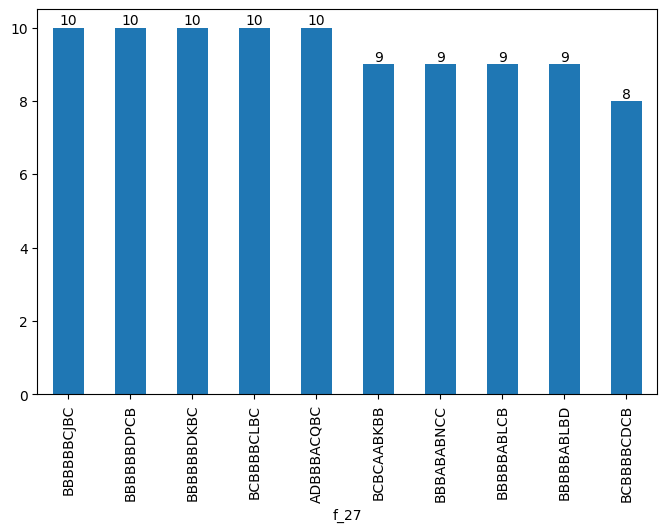

In [10]:
# object columns 
barchart(train, 'f_27')


In [11]:
relevent_features = train.columns
relevent_features


Index(['id', 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'target'],
      dtype='object')

In [12]:
from collections import Counter

def encode(df):
    index = [
        'A','B','C','D','E','F',
        'G','H','I','J','K','L',
        'M','N','O','P','Q','R',
        'S','T',                       
    ]
    for col in index:
        df[col] = 0
    
    for k, v in df['f_27'].iteritems():
        alpha_count = Counter(v)
        for l, c in alpha_count.items():
            df.at[k, l] = c
    
    display(df.head())


In [13]:
relevent_train = train
encode(relevent_train)


AttributeError: 'Series' object has no attribute 'iteritems'

In [14]:
relevent_train = relevent_train.drop('f_27', axis=1)
relevent_train = relevent_train.drop('id', axis=1)


In [15]:
from sklearn.model_selection import train_test_split


y = relevent_train['target']
X = relevent_train.drop('target', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, 
    test_size=0.2,
    train_size=0.8, 
    shuffle=True,
    random_state=42)


In [16]:
pd.options.mode.chained_assignment = None

f = [x for x in X_train.columns.values if x[0]=="f"]

X_train['abs_sum'] = X_train.loc[:,f].abs().sum(axis=1)
X_train['median']  = X_train.loc[:,f].median(axis=1)
X_train['std']     = X_train.loc[:,f].std(axis=1)
X_train['mean']    = X_train.loc[:,f].mean(axis=1)

X_train.head()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,O,P,Q,R,S,T,abs_sum,median,std,mean
52811,-0.357172,1.007846,-0.883633,-0.688728,-0.719979,-0.030453,1.342876,0,1,2,...,0,0,0,0,0,0,90.144562,1.003923,6.505198,-0.133786
475516,0.679107,-0.848965,1.446877,-1.546845,1.468392,-0.206361,0.867172,0,2,6,...,0,0,0,0,0,0,73.790251,1.293371,4.657476,2.206315
122130,0.155002,0.437601,1.072614,-1.411626,-0.104083,-0.496161,-0.996924,0,4,2,...,0,0,0,0,0,0,172.914555,1.000000,23.606523,-3.356514
701379,-1.049093,-0.383642,1.357105,0.265610,0.403743,-0.215133,-0.002942,0,3,1,...,0,0,0,0,0,0,225.687750,0.334676,35.173121,-5.995482
672853,0.764630,0.896885,0.119028,-0.550228,1.319534,-0.161651,1.350407,0,0,2,...,0,0,0,0,0,0,743.186903,0.830758,127.788559,24.202056


In [17]:
X_valid['abs_sum'] = X_valid.loc[:,f].abs().sum(axis=1)
X_valid['median']  = X_valid.loc[:,f].median(axis=1)
X_valid['std']     = X_valid.loc[:,f].std(axis=1)
X_valid['mean']    = X_valid.loc[:,f].mean(axis=1)


pd.options.mode.chained_assignment = 'warn'
X_valid.head()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,O,P,Q,R,S,T,abs_sum,median,std,mean
212188,1.277993,0.425175,0.505742,0.929733,-1.267050,-0.674631,0.102090,1,2,2,...,0,0,0,0,0,0,193.874505,1.000000,26.242057,5.407394
299036,-0.712652,-0.385336,0.017613,1.519450,0.537198,1.014196,-0.144567,2,2,1,...,0,0,0,0,0,0,168.322926,1.000000,22.881502,5.398352
475978,-0.442329,1.464636,0.712566,-0.379890,-1.006071,0.586031,0.175570,1,1,1,...,0,0,0,0,0,0,136.782425,0.675568,18.398679,3.994929
588988,-0.250481,0.451334,-0.118030,0.195040,0.230048,1.267529,-0.647605,1,3,1,...,0,0,0,0,0,0,127.258916,0.725667,16.459959,3.735225
138859,-0.048624,0.226468,1.451351,0.179835,-2.106304,0.353610,0.335875,2,2,3,...,0,0,0,0,0,0,251.634800,1.000000,38.042731,7.802064


In [18]:
from sklearn.preprocessing import RobustScaler

def robust_scale(X_t, X_v):
    scaler = RobustScaler()
    
    return pd.DataFrame(scaler.fit_transform(X_t)), pd.DataFrame(scaler.transform(X_v))

X_train_st, X_val_st = robust_scale(X_train, X_valid)


In [19]:
display_data_info({'train': X_train_st, 'test': X_val_st})


,train,test
No. rows,640000,160000
No. cols,54,54
No. null cols,0,0
No. missing values,0,0
No. duplicate rows,0,0
Float columns,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]"
Int columns,[],[]
Object columns,[],[]


In [20]:
import torch
import torch.nn as nn


class Network(nn.Module):
    def __init__(self, in_feature):
        super().__init__()
        
        self.main = nn.Sequential(
            nn.Linear(in_feature, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),

            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    
    def forward(self, x):
        x = self.main(x)
        return x.view(-1) 


In [21]:
from torch import optim

device         = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
in_feature     = X_train.shape[1]

model          = Network(in_feature)
model.to(device)

epochs         = 50
batch_size     = 1024

loss_function  = nn.BCELoss()
optimizer      = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-10)


In [22]:
from sklearn.preprocessing import StandardScaler

class TPS2022(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X.values,dtype=torch.float)
        self.Y = torch.tensor(Y.values,dtype=torch.float)
        
    def __len__(self):
        return len(self.Y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]


In [23]:
from torch.utils.data import DataLoader

train_dataset = TPS2022(X_train_st, y_train)
valid_dataset = TPS2022(X_val_st, y_valid)

train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader  = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)


In [24]:
train_losses, valid_losses = [], []
valid_loss_min = np.Inf

for i in range(epochs):
    tot_train_loss = 0
    
    model.train()
    
    for x, y in train_loader:
        pred = model(x.to(device))
        loss = loss_function(pred, y.to(device))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        tot_train_loss += loss.item()
        
    else:
        tot_valid_loss = 0
        valid_correct = 0
        
        model.eval()
        with torch.no_grad():
        
            for x, y in valid_loader:      
                pred = model(x.to(device))
                loss = loss_function(pred, y.to(device))
                tot_valid_loss += loss.item()
        
        train_loss = tot_valid_loss / len(train_loader.dataset)
        valid_loss = tot_valid_loss / len(valid_loader.dataset)
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        
        print("Epoch: {}/{}.. ".format(i+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss),
              "Test Loss: {:.3f}.. ".format(valid_loss),
              )
        
        if valid_loss  valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model.pt')
            valid_loss_min = valid_loss


SyntaxError: invalid syntax (1859306111.py, line 42)

In [25]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')


NameError: name 'train_losses' is not defined

In [26]:
model = Network(in_feature)
model.load_state_dict(torch.load('model.pt'))

model.to(device)


FileNotFoundError: [Errno 2] No such file or directory: 'model.pt'

In [27]:
feature = [f for f in relevent_features if 'f' in f]

relevent_test = test.loc[:, feature]
relevent_test.head()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,0.194491,1.180926,-1.474570,-1.969979,-0.632224,-0.908537,-0.929414,3,0,2,...,5.540808,0.566451,-3.640977,-3.134273,4.232714,1.411271,BBAABACIFB,-380.668584,0,1
1,0.073512,1.215182,1.887183,0.664100,1.445916,0.407144,-0.965463,1,0,2,...,-0.562313,1.033356,3.351333,-1.598481,-1.585360,-0.413281,AABBBBDHCC,602.721455,0,0
2,0.990606,1.390944,0.765208,-0.204159,-0.265682,0.051791,2.526925,6,4,5,...,1.094242,-3.755136,1.450646,7.071502,1.467113,2.519946,BEBBBAALCB,451.547357,0,0
3,0.621236,-1.282787,0.836890,1.208417,-0.212496,-1.729244,-0.741488,3,1,2,...,0.222260,5.028227,-1.303147,-3.905412,2.162827,-1.369400,ADBBBBDNCE,-193.028625,1,1
4,-0.143469,0.952492,-0.146993,0.362883,-0.105120,-1.208656,-1.317498,2,1,0,...,-5.391257,-0.667532,-0.731155,3.807904,-1.748775,1.013688,ABACAAFACE,50.602827,1,0


In [28]:
encode(relevent_test)


AttributeError: 'Series' object has no attribute 'iteritems'

In [29]:
relevent_test = relevent_test.drop('f_27', axis=1)

relevent_test['abs_sum'] = relevent_test.loc[:,f].abs().sum(axis=1)
relevent_test['median']  = relevent_test.loc[:,f].median(axis=1)
relevent_test['std']     = relevent_test.loc[:,f].std(axis=1)
relevent_test['mean']    = relevent_test.loc[:,f].mean(axis=1)


In [30]:
relevent_test.head()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,O,P,Q,R,S,T,abs_sum,median,std,mean
0,0.194491,1.180926,-1.474570,-1.969979,-0.632224,-0.908537,-0.929414,3,0,2,...,0,0,0,0,0,0,436.964259,1.000000,69.729325,-11.658429
1,0.073512,1.215182,1.887183,0.664100,1.445916,0.407144,-0.965463,1,0,2,...,0,0,0,0,0,0,641.861298,1.000000,109.881873,20.994225
2,0.990606,1.390944,0.765208,-0.204159,-0.265682,0.051791,2.526925,6,4,5,...,0,0,0,0,0,0,517.457844,1.420795,82.162027,16.738513
3,0.621236,-1.282787,0.836890,1.208417,-0.212496,-1.729244,-0.741488,3,1,2,...,0,0,0,0,0,0,241.192497,0.729063,35.457892,-5.608119
4,-0.143469,0.952492,-0.146993,0.362883,-0.105120,-1.208656,-1.317498,2,1,0,...,0,0,0,0,0,0,87.446662,0.657688,9.326311,2.070436


In [31]:
scaler = RobustScaler()
    
X_test_st = pd.DataFrame(scaler.fit_transform(relevent_test))


In [32]:
display_data_info({'test': X_test_st})


,test
No. rows,100000
No. cols,54
No. null cols,0
No. missing values,0
No. duplicate rows,0
Float columns,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]"
Int columns,[]
Object columns,[]


In [33]:
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, X):
        self.X = torch.tensor(X.values,dtype=torch.float)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx]
    
    
testset     = TestDataset(X_test_st)
test_loader = DataLoader(testset, batch_size=1024, shuffle=False, num_workers=0)


In [34]:
preds_class = np.array([], dtype=int)

with torch.no_grad():
    for x in test_loader:
        preds = model(x.to(device)).cpu()
        preds_class = np.append(preds_class, preds)


In [35]:
df = pd.DataFrame({
    'id': test.id,
    'target': preds_class
})

df = df.set_index('id')
df.to_csv('submission.csv')


In [36]:
df.head()


,target
id,
800000,0.487763
800001,0.488473
800002,0.483090
800003,0.492924
800004,0.491935
